<Axes: xlabel='Meldedatum'>

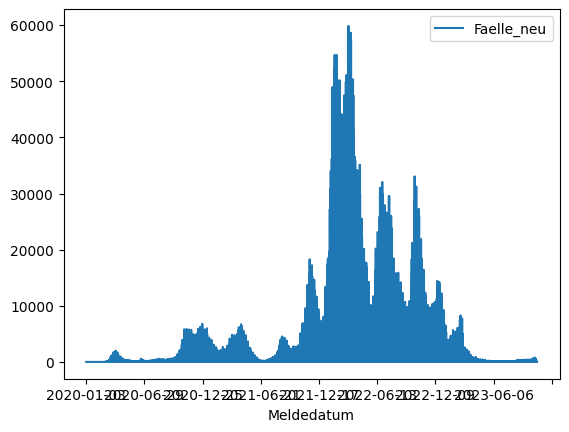

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# HINWEIS: die csv.ipynb Datei muss vorher ausgeführt worden sein, damit die notwendigen csv Datei existiert!
dataInfections = pd.read_csv('COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender_withNames.csv')
dataDeaths = pd.read_csv('COVID-19-Todesfaelle_Deutschland.csv')

# Erzeuge Diagram mit dem Datum an der X-Achse und den täglichen Fällen an der Y-Achse in Deutschland
#                  (X-Achse, Y-Achse)
dataInfections.plot(0, 5)

<Axes: xlabel='Meldedatum'>

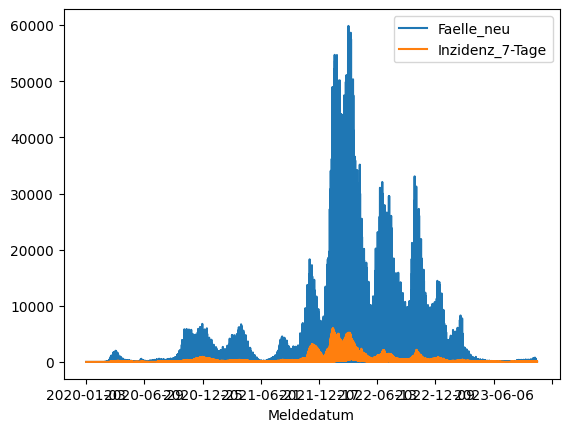

In [2]:
# Erzeuge Diagram mit dem Datum an der X-Achse und zwei Werten auf der Y-Achse: tägliche Fälle, 7-Tage-Inzidenz
#                  (X-Achse, [Y-Achse-Wert1, Y-Achse-Wert2])
dataInfections.plot(0, [5,7])

<Axes: xlabel='Berichtsdatum'>

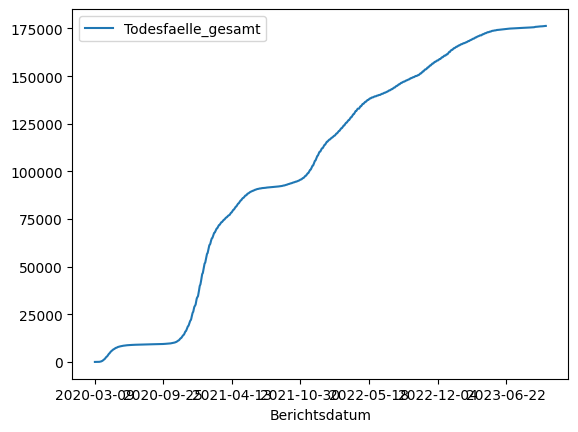

In [3]:
# Erzeuge Diagram über die gesamten Todeszahlen in Deutschland
dataDeaths.plot(0, [2])

<Axes: xlabel='Berichtsdatum'>

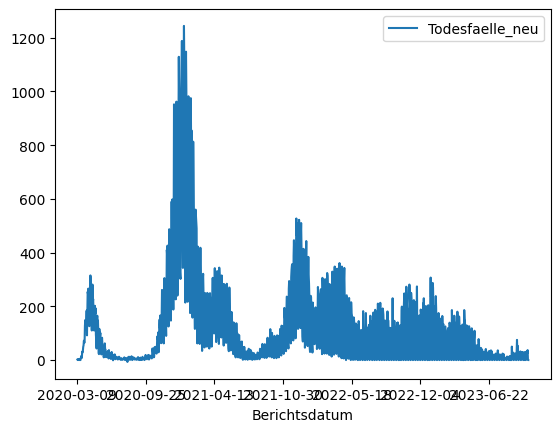

In [4]:
# Erzeuge Diagram über die täglichen Todeszahlen in Deutschland
dataDeaths.plot(0, [3])

array([<Axes: xlabel='Berichtsdatum'>, <Axes: xlabel='Berichtsdatum'>],
      dtype=object)

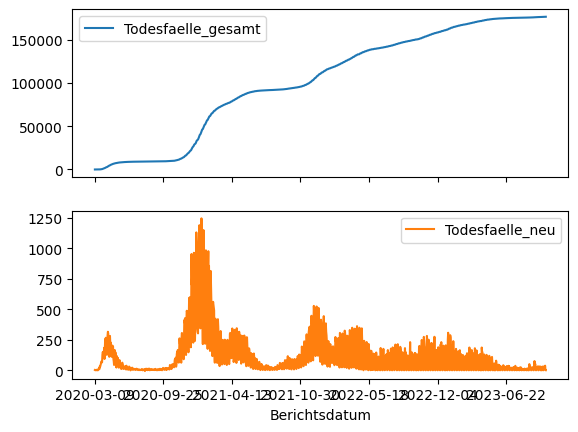

In [5]:
# Erzeuge Diagram über die gesamten und täglichen Todeszahlen in Deutschland in ein Bild
dataDeaths.plot(0, [2,3], subplots=True)

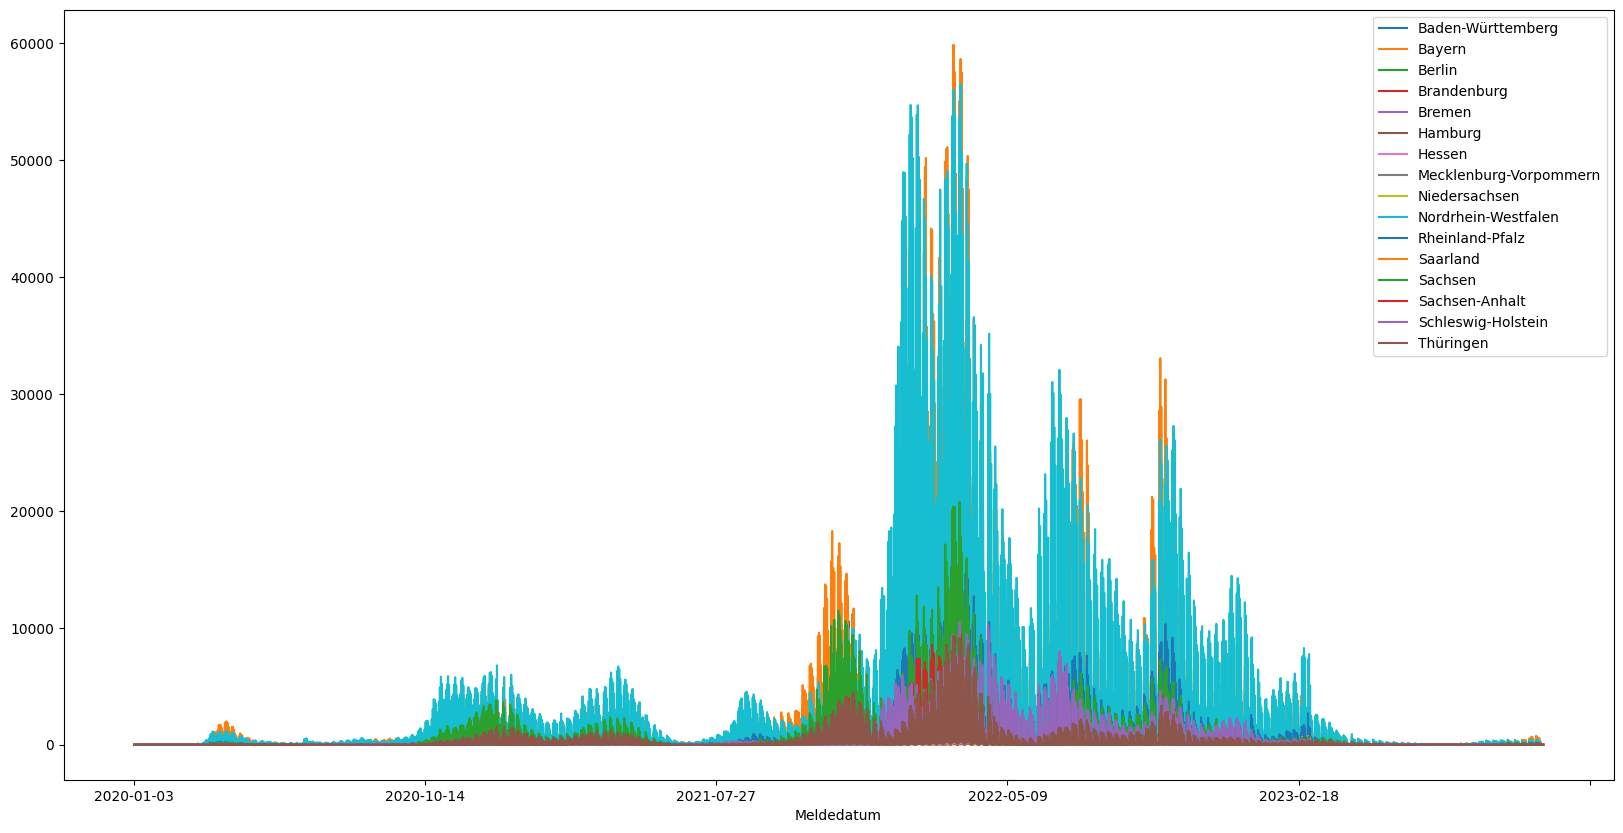

In [6]:
# Show data by state
fig, ax = plt.subplots()
for label, grp in dataInfections.groupby('Bundesland'):
    grp.plot(0, 5, ax=ax, label=label, figsize=(20,10))

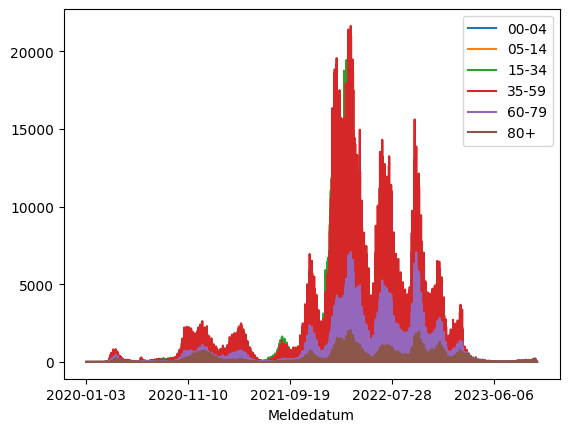

In [7]:
# Show data by age group
fig, ax = plt.subplots()
for label, grp in dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Altersgruppe'):
    grp.plot(0, 5, ax=ax, label=label)

<Axes: xlabel='Bundesland'>

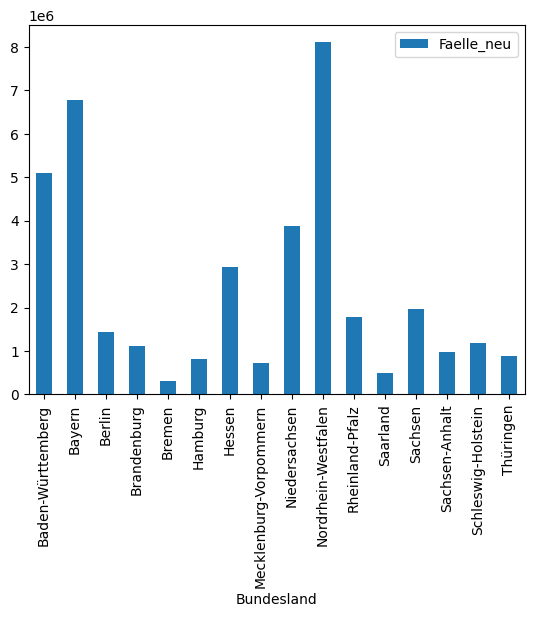

In [8]:
# Show data by bundesland as bar chart
dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Bundesland').aggregate({'Faelle_neu': 'sum'}).plot(kind='bar')

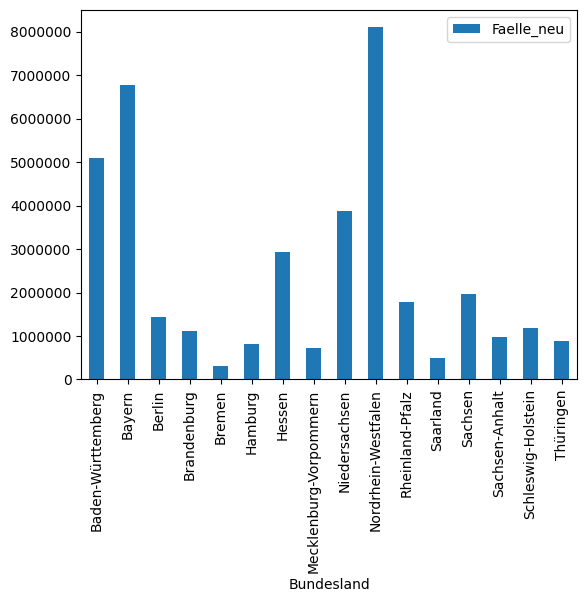

In [9]:
# Show data by bundesland as bar chart but with plain numbers
ax = dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Bundesland').aggregate({'Faelle_neu': 'sum'}).plot(kind='bar')

# Set y-axis tick labels to real numbers instead of scientific notation
ax.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

<Axes: xlabel='Altersgruppe'>

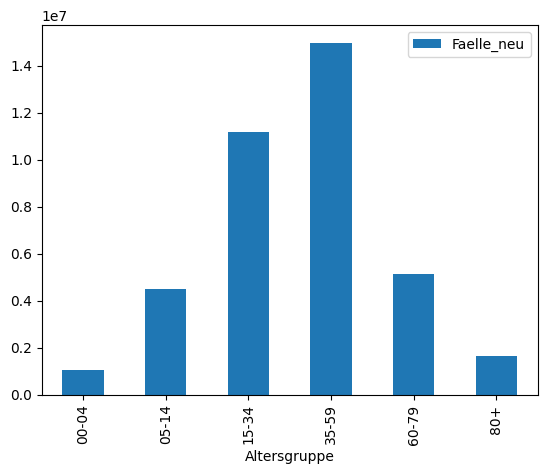

In [10]:
# Show data by age as bar chart
dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby('Altersgruppe').aggregate({'Faelle_neu': 'sum'}).plot(kind='bar')

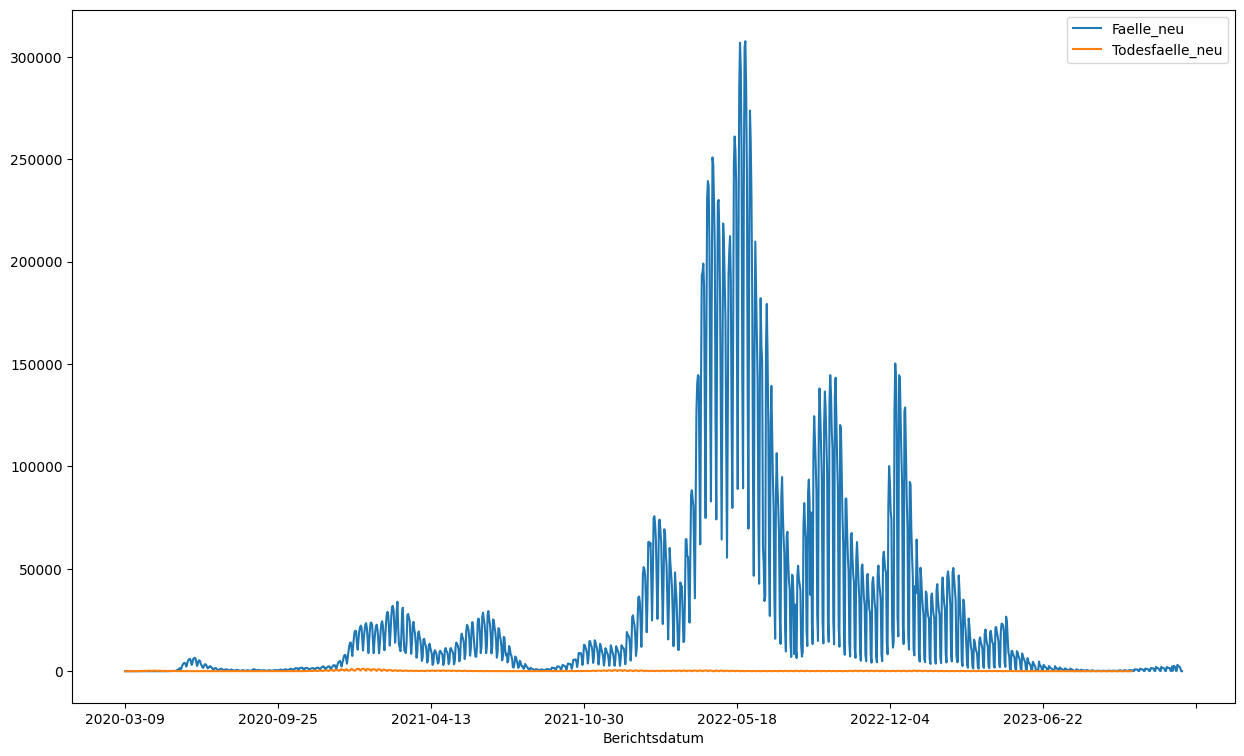

In [11]:
# Show data total per day
import matplotlib.pyplot as plt
figure, axes = plt.subplots(figsize=(15, 9))
first = dataInfections[dataInfections["Altersgruppe"] != "00+"].groupby("Meldedatum").aggregate({'Faelle_neu': 'sum'}).plot(ax=axes, kind='line')
second = dataDeaths.groupby("Berichtsdatum").aggregate({'Todesfaelle_neu': 'sum'}).plot(ax=axes, kind='line')

plt.show()

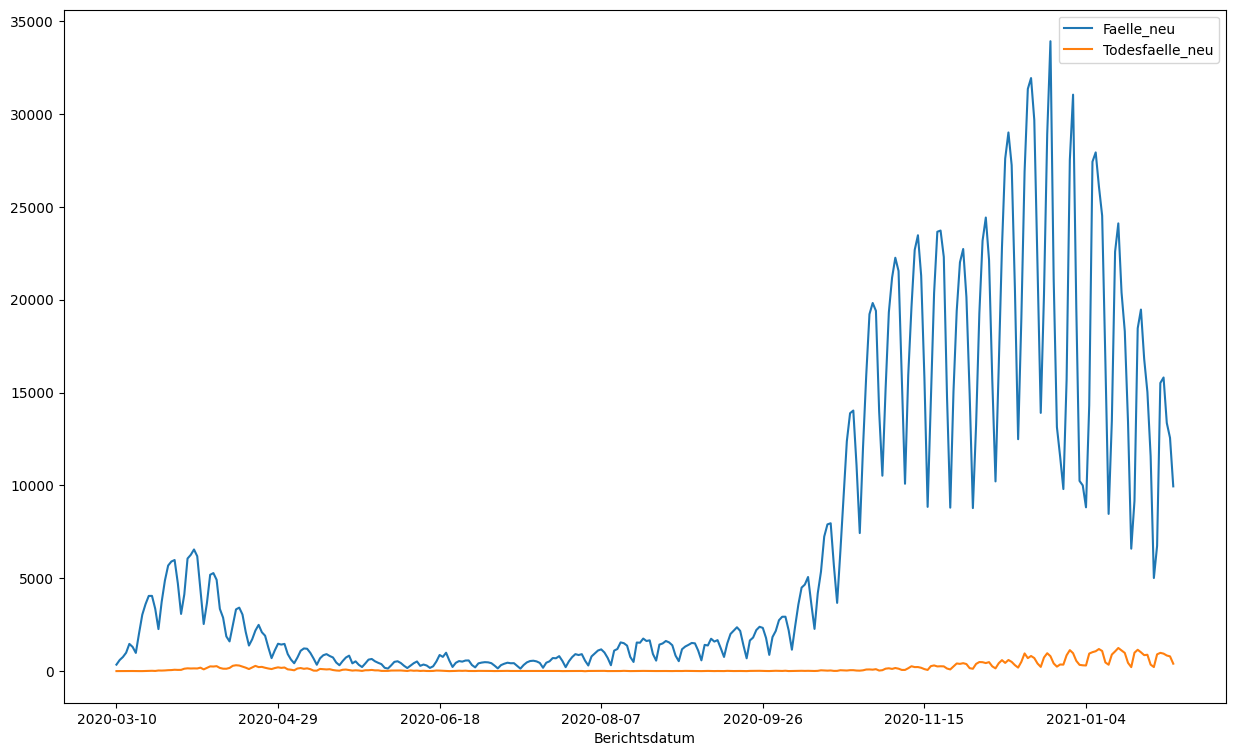

In [12]:
# Show data total per day
import matplotlib.pyplot as plt
figure, axes = plt.subplots(figsize=(15, 9))
first = dataInfections[dataInfections["Altersgruppe"] != "00+"]
second = dataDeaths

first = first.loc[(first['Meldedatum'] > '2020-03-09') & (first['Meldedatum'] < '2021-02-01')]
second = second.loc[(second['Berichtsdatum'] > '2020-03-09') & (second['Berichtsdatum'] < '2021-02-01')]

first = first.groupby("Meldedatum").aggregate({'Faelle_neu': 'sum'}).plot(ax=axes, kind='line')
second = second.groupby("Berichtsdatum").aggregate({'Todesfaelle_neu': 'sum'}).plot(ax=axes, kind='line')

plt.show()